In [61]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

rootPath = './dataset/train'

imageGenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
    validation_split=.2
)

trainGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'digital_img'),
    target_size=(64, 64),
    subset='training'
)

validationGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'digital_img'),
    target_size=(64, 64),
    subset='validation'
)

Found 424 images belonging to 7 classes.
Found 102 images belonging to 7 classes.


In [42]:
class_labels = trainGen.class_indices
print("Class labels:", class_labels)

# 클래스 레이블과 클래스 이름을 반전시켜 딕셔너리 생성
label_to_class = {v: k for k, v in class_labels.items()}
print("Label to class:", label_to_class)

Class labels: {'d1_1': 0, 'd1_2': 1, 'd1_3': 2, 'db_1': 3, 'db_2': 4, 'db_3': 5, 'foun': 6}
Label to class: {0: 'd1_1', 1: 'd1_2', 2: 'd1_3', 3: 'db_1', 4: 'db_2', 5: 'db_3', 6: 'foun'}


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()

model.add(layers.InputLayer(input_shape=(64, 64, 3)))
model.add(layers.Conv2D(16, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Conv2D(32, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Conv2D(64, (3, 3), (1, 1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(rate=0.3))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 32, 32, 16)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 16)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 16, 16, 32)       

In [8]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics=['acc'],
)

In [9]:
epochs = 32
history = model.fit(
    trainGen, 
    epochs=epochs,
    steps_per_epoch=trainGen.samples / epochs, 
    validation_data=validationGen,
    validation_steps=trainGen.samples / epochs,
)

C:\Users\kmh\AppData\Local\Temp\ipykernel_13784\2161297457.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/32
14/14 [==============================] - 18s 1s/step - loss: 0.4484 - acc: 0.1548 - val_loss: 0.4465 - val_acc: 0.2083
Epoch 2/32
14/14 [==============================] - 13s 837ms/step - loss: 0.4063 - acc: 0.2238
Epoch 3/32
14/14 [==============================] - 13s 858ms/step - loss: 0.4057 - acc: 0.2197
Epoch 4/32
14/14 [==============================] - 13s 833ms/step - loss: 0.3939 - acc: 0.2008
Epoch 5/32
14/14 [==============================] - 12s 829ms/step - loss: 0.3704 - acc: 0.3138
Epoch 6/32
14/14 [==============================] - 12s 831ms/step - loss: 0.3031 - acc: 0.4728
Epoch 7/32
14/14 [==============================] - 12s 828ms/step - loss: 0.2370 - acc: 0.6464
Epoch 8/32
14/14 [==============================] - 13s 841ms/step - loss: 0.1856 - acc: 0.7134
Epoch 9/32
14/14 [==============================] - 13s 847ms/step - loss: 0.1741 - acc: 0.7490
Epoch 10/32
14/14 [==============================] - 13s 852ms/step - loss: 0.1472 - acc: 0.7657
Epoch

ValueError: x and y must have same first dimension, but have shapes (32,) and (1,)

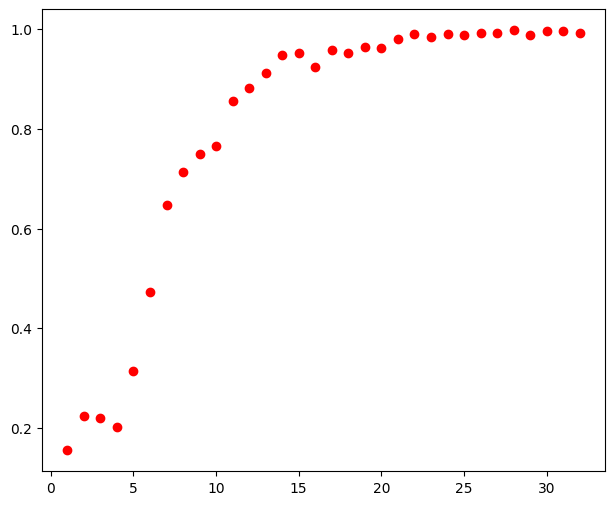

In [20]:
def show_graph(history):
    accuracy = history.history['acc']
    val_accuracy = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(16, 6))

    plt.subplot(121)
    plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(122)
    # loss 및 val_loss 데이터의 크기를 epochs에 맞게 조정
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

show_graph(history)

In [27]:
rootPath = './dataset/train'


testGenerator = ImageDataGenerator(
    rescale=1./255
)

testGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'digital_img'),
    target_size=(64, 64),
)

model.evaluate_generator(testGen)

Found 526 images belonging to 7 classes.


C:\Users\kmh\AppData\Local\Temp\ipykernel_13784\2171007069.py:13: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(testGen)


[0.007644017692655325, 0.9942965507507324]

In [34]:
import numpy as np
from PIL import Image
import random

# 이미지 열기
img_path = 'd1_1_0.png'
i = Image.open(img_path)

# 이미지를 NumPy 배열로 변환
img_np = np.array(i)

# img_np와 같은 형태의 랜덤 행렬 생성
#r = np.random.randint(-30, 30, size=img_np.shape)

# 벡터화된 연산을 사용하여 img_np 업데이트
#img_np = img_np - r

# 값이 이미지 범위 [0, 255] 내에 있도록 클립
#img_np = np.clip(img_np, 0, 255)

# 업데이트된 NumPy 배열을 이미지로 변환
#n = Image.fromarray(img_np.astype(np.uint8))

# 수정된 이미지 보기
#n

In [70]:
from tensorflow.keras.preprocessing.image import array_to_img
import numpy as np

img_path = './pred/pre4.png'
i = Image.open(img_path)

img_np = np.array(i)

# img_np가 1280 * 1280 이미지인 것으로 가정합니다.

resized_img_np = np.array(array_to_img(img_np).resize((64, 64)))
resized_img_np = resized_img_np / 255.0

result = model.predict(resized_img_np.reshape(1, 64, 64, 3))
print(result)
predicted_class_prob = np.max(result)  # 최댓값을 찾음
predicted_class_index = np.argmax(result)  # 최댓값의 인덱스를 찾음
print(label_to_class[predicted_class_index])

ValueError: cannot reshape array of size 16384 into shape (1,64,64,3)